# 1. Loading the Dataset i.e. Churn Prediction Dataset

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import numpy as np
import random as rd
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("churn_prediction.csv")

In [3]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


# 2. Data Exploration

In [4]:
data.shape

(28382, 21)

In [5]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [6]:
data.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [7]:
data['churn'].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

Data looks imbalanced, as there are only 22.7% entries who'd churn

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026A561CDA20>,
      dtype=object)

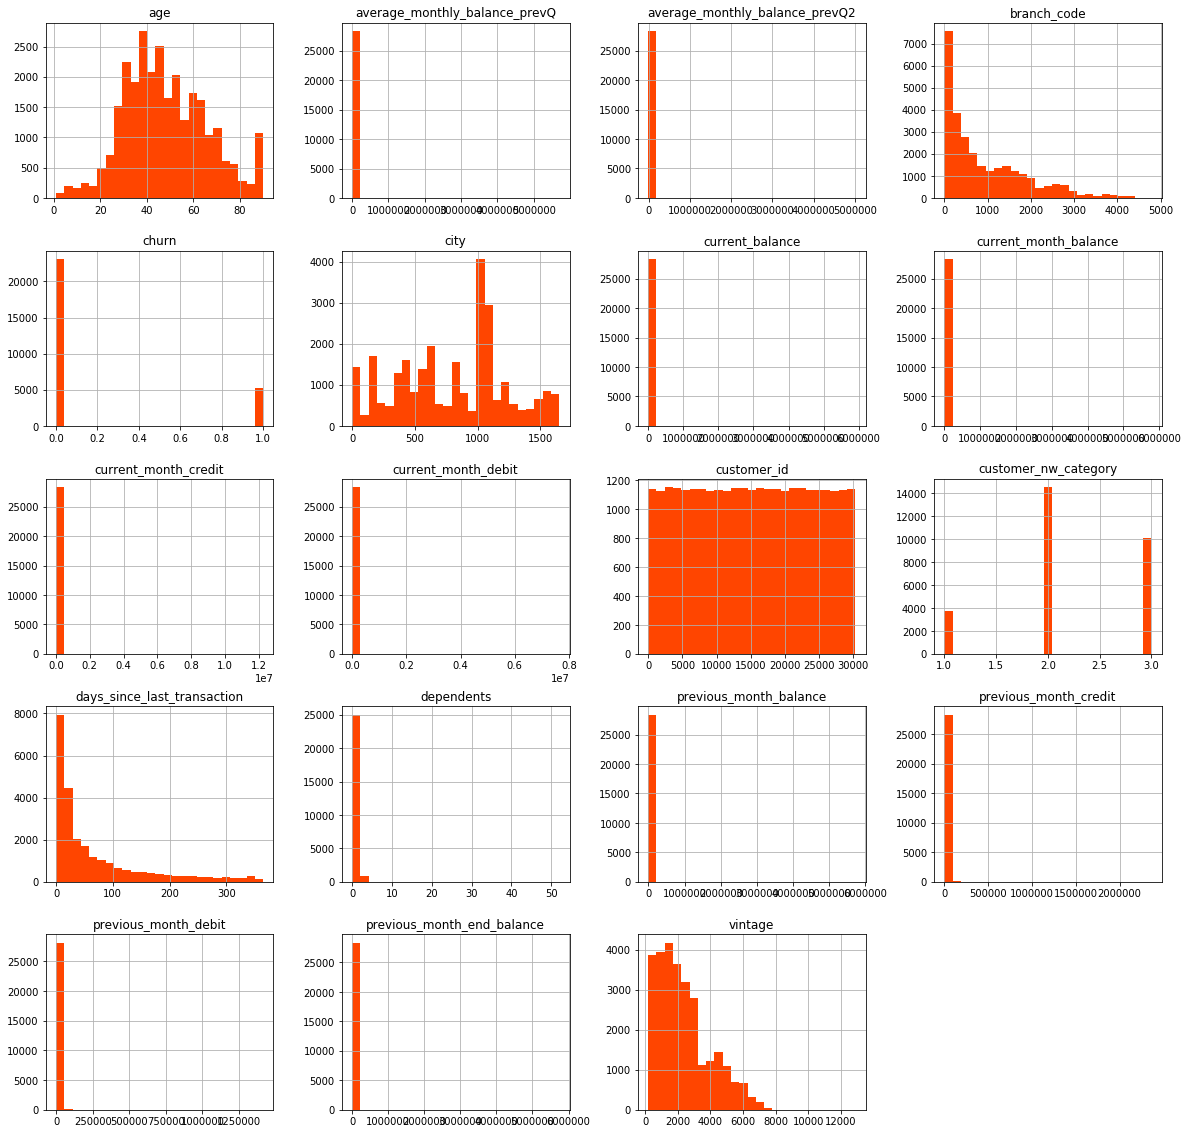

In [8]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
data.hist(ax =  ax, bins = 25, color='orangered')

In [9]:
# dropping customer id variable
data.drop('customer_id', axis = 1, inplace = True)

# 3. Imputing Missing Values with Some Analysis

In [10]:
data.isnull().sum()

vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [11]:
data['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

### 3.1. Imputing missing gender with male because missing are only 525 but the dataset is very large 28382 and males are 5000+ more than females

In [12]:
data['gender'].fillna(value='Male',inplace=True)

In [13]:
data.isnull().sum()

vintage                              0
age                                  0
gender                               0
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

### 3.2. Imputing outliers in dependents with median i.e. 0

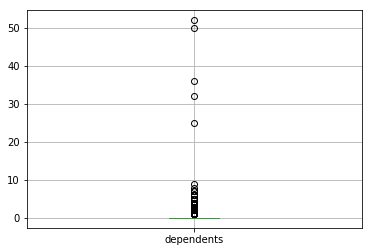

In [14]:
data.boxplot('dependents')

In [15]:
data['dependents'] = np.where(data['dependents'] >10, data['dependents'].median(),data['dependents'])

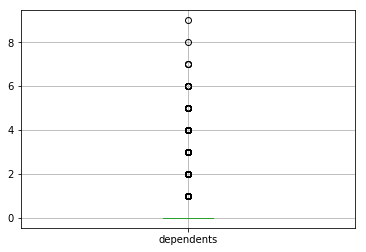

In [16]:
data.boxplot('dependents')

### 3.3. Value Counts

In [17]:
temp = ['gender','occupation','dependents']
for i in temp:
    print('************ Value Count in', i, '************')
    print(data[i].value_counts())
    print('')

************ Value Count in gender ************
Male      17073
Female    11309
Name: gender, dtype: int64

************ Value Count in occupation ************
self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

************ Value Count in dependents ************
0.0    21440
2.0     2150
1.0     1395
3.0      701
4.0      179
5.0       41
6.0        8
7.0        3
9.0        1
8.0        1
Name: dependents, dtype: int64



### 3.4. To impute missing dependents we can use try finding relation between age, gender, net worth

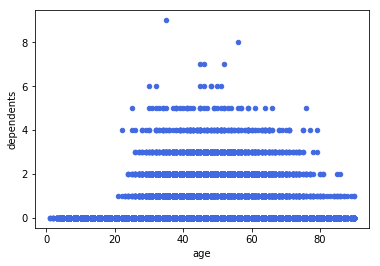

In [18]:
data.plot.scatter('age','dependents', color='royalblue')
# no strong pattern found though

In [19]:
# so imputing missing dependents values using mode i.e. 0
data['dependents'].fillna(0,inplace=True)

### 3.5. Imputing missing occupation values with max. occuring value i.e. self_employed

In [20]:
data['occupation'].fillna(value = 'self_employed', inplace=True)

In [21]:
data['occupation'].value_counts()

self_employed    17556
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [22]:
data.isnull().sum()

vintage                              0
age                                  0
gender                               0
dependents                           0
occupation                           0
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

### 3.6. Taking records with city value present, instead of removing records with null city value, as they count only 803, i.e. approx 3% of total data

In [23]:
data = data[data['city'].notna()]
# taken rows where city is not null, not dropped

- People with more than 4 dependents are very less make less transactions or have less recent transactions
- From 0-20 and above 70 aged people are less and make less transactions or have less recent transactions

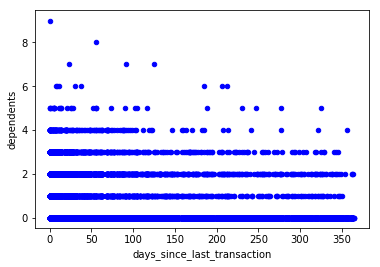

In [24]:
data.plot.scatter('days_since_last_transaction','dependents', color='b')

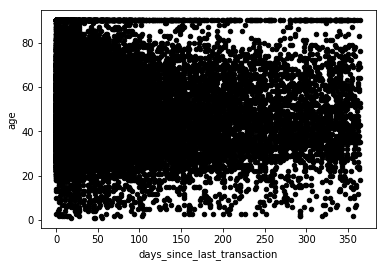

In [25]:
data.plot.scatter('days_since_last_transaction','age', color='k')

In [26]:
# for days since last transaction imputing them with mode i.e. 0 because majority have 0
data['days_since_last_transaction'].fillna(0,inplace=True)

In [27]:
data.isnull().sum()

vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

- No duplicates were found

# 4. Univariate Analysis

### 4.1. Plots

Text(0,0.5,'Frequency')

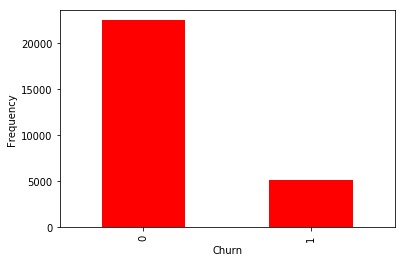

In [28]:
# target variable is churn
data['churn'].value_counts().plot(kind = 'bar', color='r')
plt.xlabel('Churn')
plt.ylabel('Frequency')

Text(0.5,0,'Age')

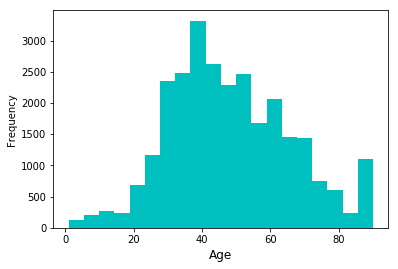

In [29]:
data['age'].plot.hist(bins = 20, color='c')
plt.xlabel('age', fontsize=12)
plt.xlabel('Age')

- Most people are in the 30-65 age group
- Age data is very slightly left-skewed

In [30]:
data['age'].value_counts()

90    980
40    698
43    688
42    680
37    669
39    665
44    659
36    653
38    647
41    638
33    624
34    617
45    599
47    592
35    591
48    589
46    585
49    527
30    522
51    522
32    513
31    513
52    491
54    491
50    487
53    470
61    463
58    438
62    436
55    426
     ... 
79    119
80    109
81    105
19     81
84     69
14     67
18     67
82     64
9      62
16     62
83     61
15     60
10     57
13     56
17     56
12     56
7      51
8      51
85     48
6      43
86     42
5      41
11     38
3      34
87     34
4      32
89     24
88     20
2      17
1       4
Name: age, Length: 90, dtype: int64

### 4.2. Value counts

In [31]:
data['occupation'].value_counts()

self_employed    17061
salaried          6511
student           2005
retired           1965
company             37
Name: occupation, dtype: int64

In [32]:
data['gender'].value_counts()/len(data)

Male      0.600203
Female    0.399797
Name: gender, dtype: float64

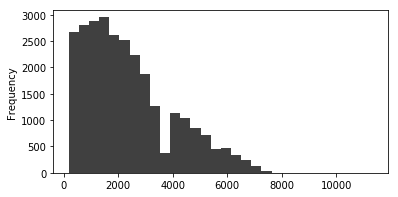

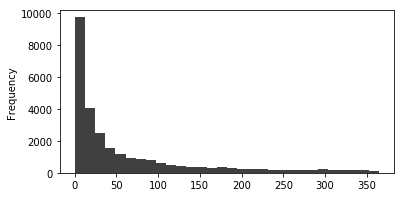

In [33]:
plt.figure(figsize=(6,3))
data['vintage'].plot.hist(bins=30,color='0.25')

plt.figure(figsize=(6,3))
data['days_since_last_transaction'].plot.hist(bins=30,color='0.25')

##### Transforming vintage and days_since_last_transaction using square root, as they were right-skewed

In [34]:
data['vintage'] = data['vintage'].transform(func='sqrt')
data['days_since_last_transaction'] = data['days_since_last_transaction'].transform(lambda x:x**0.5)

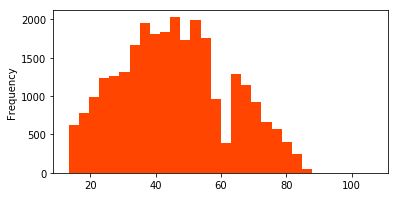

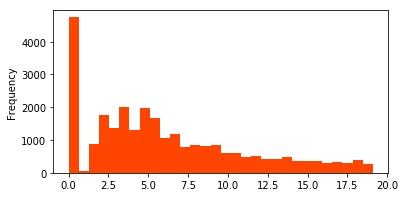

In [35]:
plt.figure(figsize=(6,3))
data['vintage'].plot.hist(bins=30,color='orangered')

plt.figure(figsize=(6,3))
data['days_since_last_transaction'].plot.hist(bins=30,color='orangered')

# 5. Bivariate Analysis

In [36]:
data.columns

Index(['vintage', 'age', 'gender', 'dependents', 'occupation', 'city',
       'customer_nw_category', 'branch_code', 'days_since_last_transaction',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'churn'],
      dtype='object')

### 5.1. Hypothesis:
- Tendency to churn could increase with less frequent transactions or more number of days_since_last_transaction
- Tendency to churn could increase with less less (average_monthly_balance_prevQ and average_monthly_balance_prevQ2) than threshold
- Tendency to churn could increase with more (current_month_debit + previous_month_debit) and less (current_month_credit + previous_month_credit) than threshold , OR the current_month_balance + previous_month_balance

Text(0,0.5,'Churn')

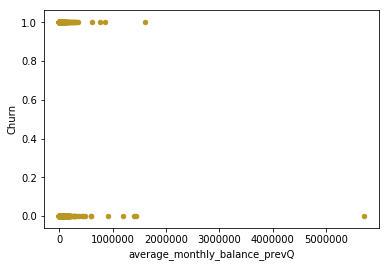

In [37]:
data.plot.scatter('average_monthly_balance_prevQ','churn', color='#ba9723')
plt.ylabel('Churn')

- Data seems pretty balanced for features of net worth and occupation

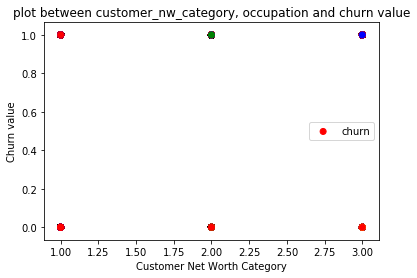

In [38]:
fig, ax = plt.subplots()
colors = {'self_employed':'red', 'salaried':'blue', 'student':'green', 'retired':'yellow', 'company':'black'}
ax.scatter(data['customer_nw_category'], data['churn'], c=data['occupation'].apply(lambda x: colors[x]))
plt.title('plot between customer_nw_category, occupation and churn value')
plt.xlabel('Customer Net Worth Category')
plt.ylabel('Churn value')
plt.legend()
plt.show()

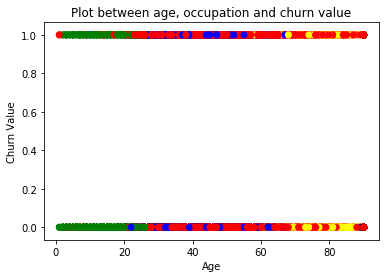

In [39]:
fig, ax = plt.subplots()
colors = {'self_employed':'red', 'salaried':'blue', 'student':'green', 'retired':'yellow', 'company':'black'}
ax.scatter(data['age'], data['churn'], c=data['occupation'].apply(lambda x: colors[x]))
plt.title('Plot between age, occupation and churn value')
plt.xlabel('Age')
plt.ylabel('Churn Value')
#plt.legend(['self_employed','salaried','student','retired','company'])
plt.show()

Text(0.5,0,'Churn')

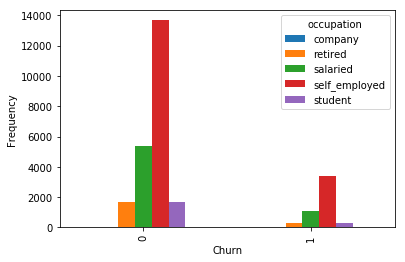

In [40]:
pd.crosstab(data['churn'],data['occupation']).plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Churn')

In [41]:
data.groupby('occupation')['vintage'].mean()

occupation
company          59.688265
retired          49.236585
salaried         47.176000
self_employed    45.439257
student          40.044974
Name: vintage, dtype: float64

Text(0.5,0,'Churn')

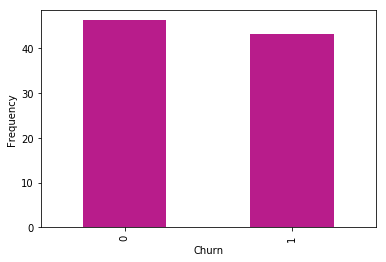

In [42]:
data.groupby('churn')['vintage'].mean().plot.bar(color='#b81c8b')
plt.ylabel('Frequency')
plt.xlabel('Churn')

Text(0,0.5,'Vintage')

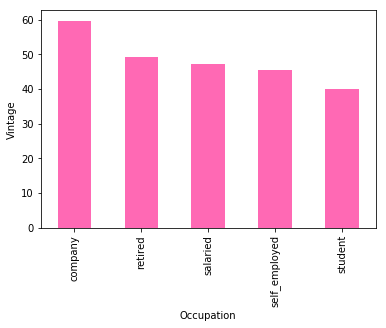

In [43]:
data.groupby('occupation')['vintage'].mean().plot.bar(color='hotpink')
plt.xlabel('Occupation')
plt.ylabel('Vintage')

Text(0.5,1,'For self employed younger than 20')

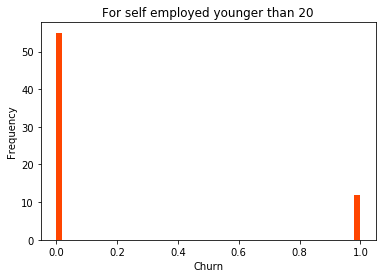

In [44]:
temp_data = data.loc[(data['occupation']=='self_employed')&(data['age']<20)]
temp_data['churn'].plot.hist(bins=50, color='orangered')
plt.xlabel('Churn')
plt.title('For self employed younger than 20')

Text(0.5,0,'Churn Value')

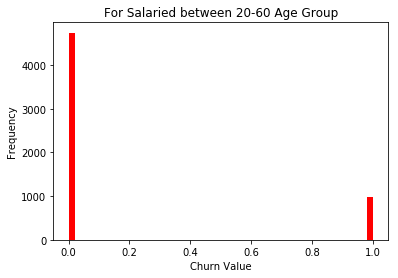

In [45]:
temp_data = data.loc[(data['occupation']=='salaried')&(data['age']>20)&(data['age']<60)]
temp_data['churn'].plot.hist(bins=50, color='r')
plt.title('For Salaried between 20-60 Age Group')
plt.xlabel('Churn Value')

Text(0.5,0,'Churn Value')

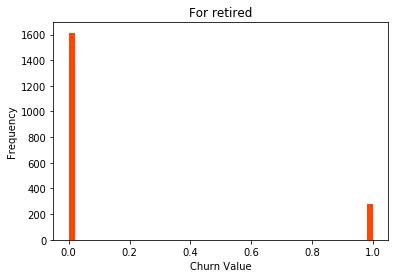

In [46]:
temp_data = data.loc[(data['occupation']=='retired')&(data['age']>60)]
temp_data['churn'].plot.hist(bins=50, color='orangered')
plt.title('For retired')
plt.xlabel('Churn Value')

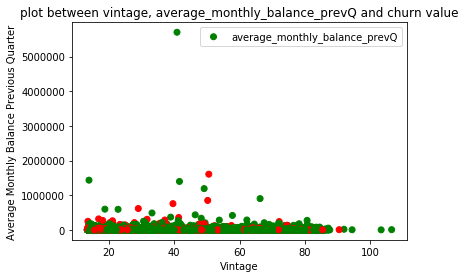

In [47]:
fig, ax = plt.subplots()
colors = {0:'green', 1:'red'}
ax.scatter(data['vintage'], data['average_monthly_balance_prevQ'], c=data['churn'].apply(lambda x: colors[x]))
plt.title('plot between vintage, average_monthly_balance_prevQ and churn value')
plt.xlabel('Vintage')
plt.ylabel('Average Monthly Balance Previous Quarter')
plt.legend()
plt.show()

- Correlations

In [48]:
data['vintage'].corr(data['churn'])

-0.06891400667887286

In [49]:
data['average_monthly_balance_prevQ2'].corr(data['churn'])

0.018347852732636616

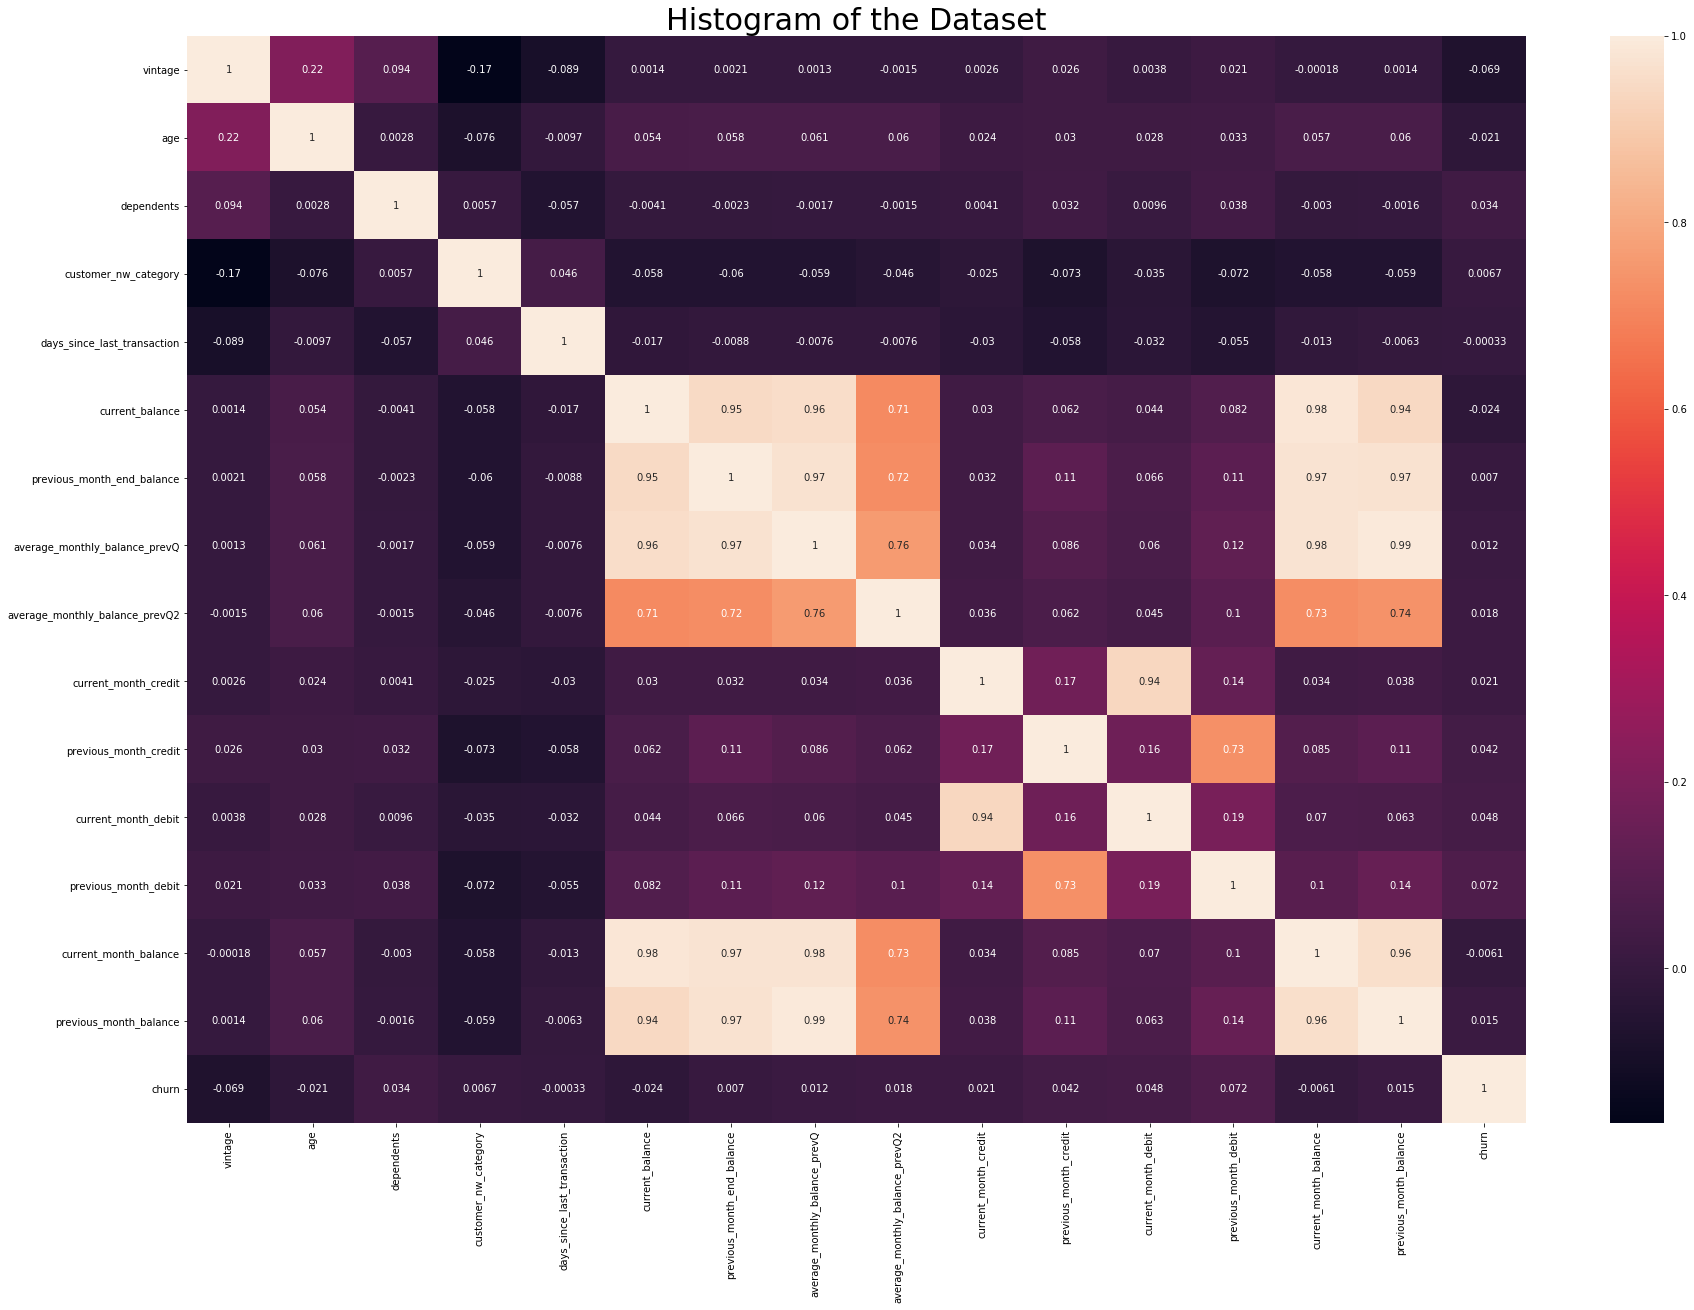

In [50]:
#data.corr()
plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(data[['vintage','age','dependents','customer_nw_category','days_since_last_transaction','current_balance','previous_month_end_balance','average_monthly_balance_prevQ','average_monthly_balance_prevQ2','current_month_credit','previous_month_credit','current_month_debit','previous_month_debit','current_month_balance','previous_month_balance','churn',]].corr(), annot = True)

plt.title('Histogram of the Dataset', fontsize = 30)
plt.show()

# 6. Modeling

In [58]:
data = pd.get_dummies(data,dtype = 'int')
x = data.drop('churn',axis=1)
y = data['churn']
x.shape, y.shape

((27579, 24), (27579,))

## 6.1. Logistic Regression

In [52]:
#from sklearn.preprocessing import OneHotEncoder

- Splitting

In [53]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y= train_test_split(x, y, test_size = 0.20, stratify = y, random_state = 42)

- Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
valid_x = scaler.fit_transform(valid_x)

- Fitting

In [84]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

- Predicting and Evaluating

In [85]:
pred_train = lr.predict_proba(train_x)
pred_valid = lr.predict_proba(valid_x)
print(pred_valid)


[[0.88036047 0.11963953]
 [0.6911873  0.3088127 ]
 [0.86607679 0.13392321]
 ...
 [0.85016411 0.14983589]
 [0.83418226 0.16581774]
 [0.81072764 0.18927236]]


In [59]:
print('ROC score for predict_proba w.r.t train data: ',roc_auc_score(train_y, pred_train[:,1]))
print('ROC score for predict_proba w.r.t validation data: ',roc_auc_score(valid_y, pred_valid[:,1]))
valid_prediction = lr.predict(valid_x)
print('Accuracy score for predict: ',accuracy_score(valid_prediction, valid_y))

ROC score for predict_proba w.r.t train data:  0.7607796426726375
ROC score for predict_proba w.r.t validation data:  0.7760502421961386
Accuracy score for predict:  0.8330311820159536


In [60]:
confusion_matrix(valid_prediction, valid_y)

array([[4376,  800],
       [ 121,  219]], dtype=int64)

#### WITHOUT THE CITY AND BRANCH CODE VARIABLE

In [61]:
without_city_branch = data.drop(['city','branch_code'], axis = 1)
without_city_branch.columns

Index(['vintage', 'age', 'dependents', 'customer_nw_category',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'gender_Female', 'gender_Male', 'occupation_company',
       'occupation_retired', 'occupation_salaried', 'occupation_self_employed',
       'occupation_student'],
      dtype='object')

In [62]:
x_without_city_branch = without_city_branch.drop('churn',axis=1)
y_without_city_branch = without_city_branch['churn']

In [ ]:
confusion_matrix(valid_prediction_wc, valid_y_wc)

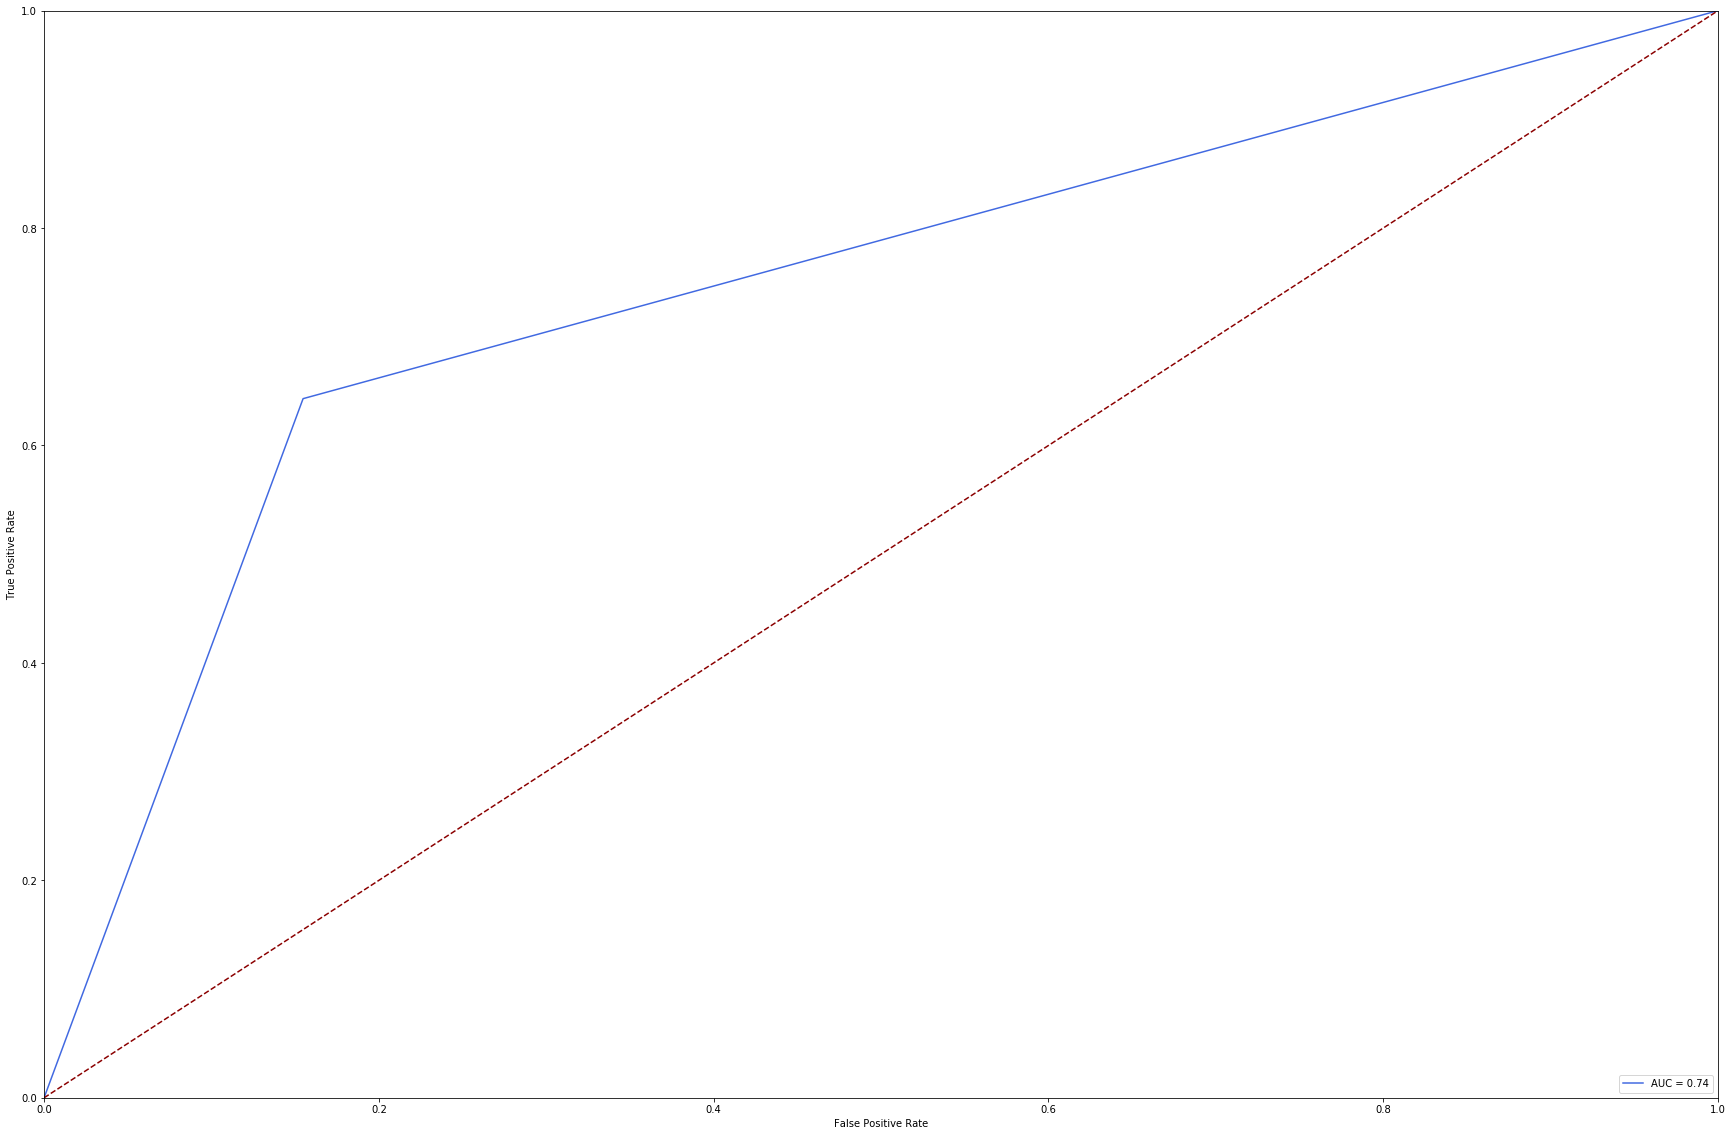

In [64]:
# plot roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(valid_prediction_wc,valid_y_wc)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, color='royalblue')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color='#8B0000')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.rcParams['figure.figsize'] = (6, 5)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 6.2. Decision Tree Classification

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

- Split and Scale

In [91]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y= train_test_split(x, y, test_size = 0.20, stratify = y, random_state = 42)

train_x = scaler.fit_transform(train_x)
valid_x = scaler.fit_transform(valid_x)
train_x.shape, valid_x.shape

((22063, 24), (5516, 24))

- Training

In [92]:
dt = DecisionTreeClassifier(criterion="gini", max_depth = 3,splitter="random")
dt.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

- Predicting

In [93]:
dt_pred = dt.predict(valid_x)

- Evaluating

In [94]:
print("Decision Trees Accuracy: ", accuracy_score(dt_pred,valid_y))

dt.score(train_x,train_y), dt.score(valid_x,valid_y)

Decision Trees Accuracy:  0.8150833937635968


(0.8153922857272357, 0.8150833937635968)

In [74]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(DecisionTreeClassifier(criterion="gini", max_depth = 5), X=train_x_wc, y=train_y_wc, cv=10)
score

array([0.85364749, 0.85138197, 0.8554599 , 0.86225646, 0.85274128,
       0.85358114, 0.8467815 , 0.85584769, 0.86122449, 0.85034014])

In [75]:
score.mean()*100, score.std()*100

(85.43262047841932, 0.4461871347757128)

In [76]:
dtc = DecisionTreeClassifier(criterion="gini", max_depth = 5, splitter='random')
dtc.fit(train_x_wc,train_y_wc)
score = dtc.score(train_x_wc,train_y_wc)
score1 = dtc.score(valid_x_wc,valid_y_wc)
score,score1

(0.8160268322530934, 0.8168963016678753)

In [77]:
from sklearn import tree
!pip install graphviz
decision_tree_image = tree.export_graphviz(dtc,out_file='tree.dot',feature_names=x_without_city_branch.columns,max_depth=2,filled=True)

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [78]:
#!dot -Tpng tree.dot -o tree.png
image = plt.imread('../input/tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

FileNotFoundError: [Errno 2] No such file or directory: '../input/tree.png'

## 6.4. Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

- Split and Scale all without City and Branch Code variables

In [96]:
from sklearn.model_selection import train_test_split
train_x_rf, valid_x_rf, train_y_rf, valid_y_rf= train_test_split(x_without_city_branch, y_without_city_branch, test_size = 0.2, stratify = y_without_city_branch)

train_x_rf = scaler.fit_transform(train_x_rf)
valid_x_rf = scaler.fit_transform(valid_x_rf)

- Train

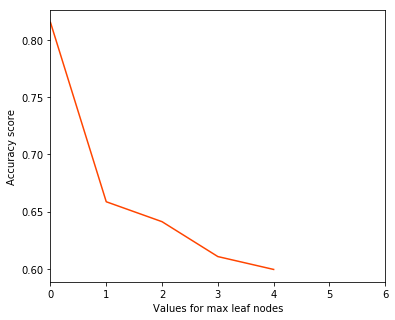

In [97]:
lnodes_vals = []
train_x_rf, valid_x_rf, train_y_rf, valid_y_rf= train_test_split(x_without_city_branch, y_without_city_branch, test_size = 0.20, stratify = y_without_city_branch)
train_x_rf = scaler.fit_transform(train_x_rf)
valid_x_rf = scaler.fit_transform(valid_x_rf)
for n in range(2,7):
    RF = RandomForestClassifier(max_depth=22,n_estimators=30,random_state = 42, max_leaf_nodes=n)
    RF.fit(train_x_rf,train_y_rf)
    pred_RF = RF.predict(valid_x_rf)
    lnodes_vals.append(accuracy_score(valid_y_rf, pred_RF))
    
plt.plot(lnodes_vals, color='orangered')
plt.ylabel('Accuracy score')
plt.xlabel('Values for max leaf nodes')
plt.xlim(0,6)
plt.show()

In [98]:
RF = RandomForestClassifier(max_depth=22,n_estimators=30,random_state = 42, max_leaf_nodes=2)
RF.fit(train_x_rf,train_y_rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=22, max_features='auto', max_leaf_nodes=2,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

- Predict

In [99]:
pred_RF = RF.predict(valid_x_rf)

- Evaluate

In [100]:
print("Random Forest's Accuracy: ", accuracy_score(valid_y_rf, pred_RF))
print("F1 SCORE: ", f1_score(valid_y_rf, pred_RF, average='weighted'))
RF.score(train_x_rf,train_y_rf),RF.score(valid_x_rf,valid_y_rf)

Random Forest's Accuracy:  0.8152646845540247
F1 SCORE:  0.7322970710954657


(0.8151656619680008, 0.8152646845540247)

# 7. Observations and Result

## 7.1. Relative feature Importance

Feature Ranking:
1. Feature 13 (0.200000)
2. Feature 5 (0.166667)
3. Feature 11 (0.133333)
4. Feature 4 (0.100000)
5. Feature 6 (0.100000)
6. Feature 12 (0.100000)
7. Feature 10 (0.066667)
8. Feature 0 (0.066667)
9. Feature 14 (0.033333)
10. Feature 20 (0.033333)
11. Feature 15 (0.000000)
12. Feature 16 (0.000000)
13. Feature 9 (0.000000)
14. Feature 8 (0.000000)
15. Feature 7 (0.000000)
16. Feature 17 (0.000000)
17. Feature 18 (0.000000)
18. Feature 19 (0.000000)
19. Feature 3 (0.000000)
20. Feature 2 (0.000000)
21. Feature 1 (0.000000)
22. Feature 21 (0.000000)


<Figure size 432x360 with 0 Axes>

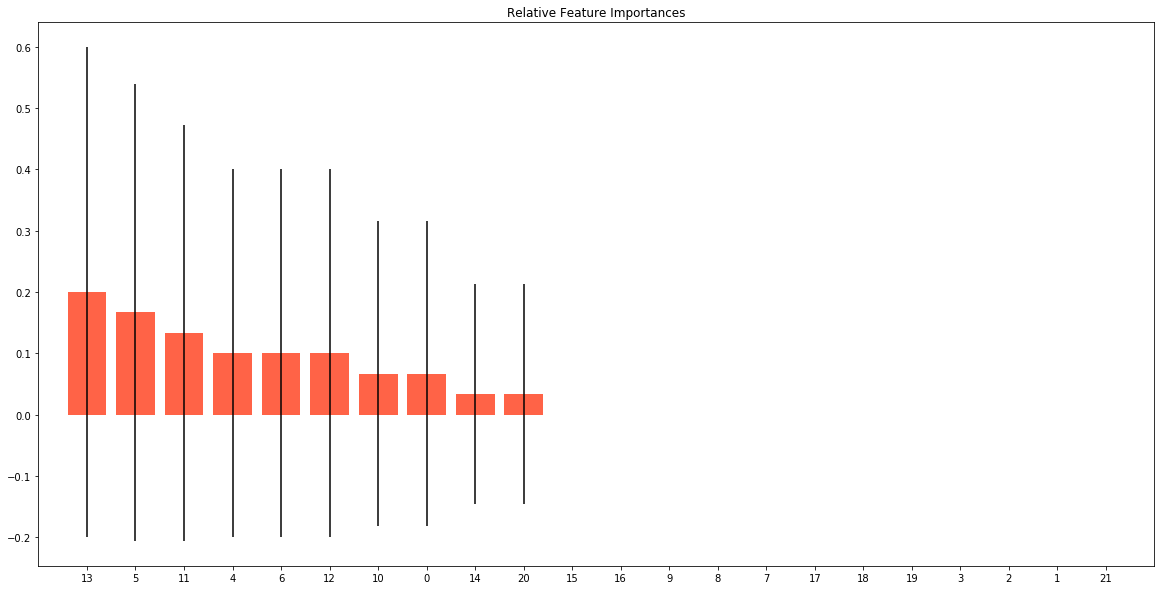

In [101]:
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1][:40]

# Print the feature ranking
print("Feature Ranking:")

for f in range(train_x_rf.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
fig = plt.figure(figsize=(20, 10));
plt.title("Relative Feature Importances")
plt.bar(range(train_x_rf.shape[1]), importances[indices],
       color="#FF6347", yerr=std[indices], align="center", ecolor='k')
plt.xticks(range(train_x_rf.shape[1]), indices)
plt.xlim([-1, train_x_rf.shape[1]])
plt.show()

## From the above, plot it is evident that some features impact churn more than others. 
- Previous Month Debit
- Days Since Last Transaction
- Previous Month Credit
- Customer Net Worth Category
- Current Balance

# 8. Conclusion

### The customers who are likely to churn may:
#### Have lesser current balance
#### Have more previous month debit
#### Have less vintage
#### Have average balance fall below minimum, in the next quarter